You can click below to open in Google Colab

For JohnGBaker:knh branch:[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnGBaker/tdamm_test/blob/knh/notebooks/DemoExample.ipynb)
For goeffryan:main branch:[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/geoffryan/tdamm_test/blob/main/notebooks/DemoExample.ipynb)

In [1]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/geoffryan/tdamm_test.git
    !cd tdamm_test;git pull
    !pip install ./tdamm_test
    !pip install afterglowpy
    !pip isntall kilonova-heating-model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants
import tdamm

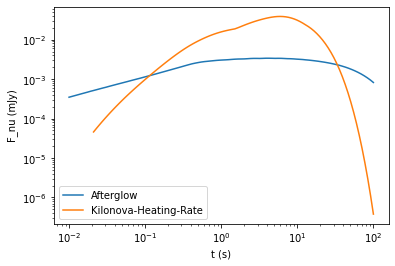

In [3]:
fig, ax = plt.subplots(1, 1)

t = np.geomspace(1.0e-2, 1.0e2, 100) * u.day
nu = 1.0e14 * u.Hz
plotunit=u.mJy

#afterglowpy
model = tdamm.AfterglowModel()
F = model(t, nu, thetaObs=10*u.deg, z=0.5, d_L=1.0e27*u.cm)
ax.plot(t, F.to(plotunit), label="Afterglow")


#kilonova-heating-rate        
t = np.geomspace(2.1e-2, 1.0e2, 100) * u.day
mass = 0.05 * u.Msun
velocities = np.asarray([0.1, 0.2, 0.4]) * constants.c
opacities = np.asarray([3.0, 0.5]) * u.cm**2 / u.g
n=4.5
distance=100 * u.Mpc
z=0.0228
model= tdamm.KilonovaHeatingRateModel( mass,velocities,opacities,n,distance,z)
F = model(t, nu)
ax.plot(t, F.to(plotunit), label="Kilonova-Heating-Rate")

ax.set(xscale='log', yscale='log')
ax.set_xlabel('t (s)')
ax.set_ylabel('F_nu ('+plotunit.name+')')
plt.legend()
plt.show()

/Users/jgbaker/miniconda3/lib/python3.8/site-packages/astropy/units/quantity.py:614: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
No handles with labels found to put in legend.


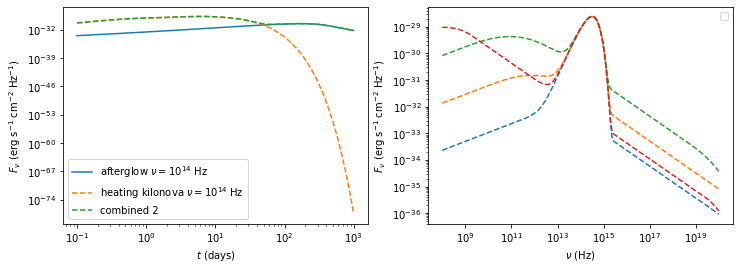

In [4]:

thetaObs = 20.0 * u.deg
z = 0.1
d_L = 460.8 * u.Mpc

mass = 0.05 * u.Msun
velocities = np.asarray([0.1, 0.2, 0.4]) * constants.c
opacities = np.asarray([3.0, 0.5]) * u.cm**2 / u.g
n = 4.5

# Initialize the model objects
afterglow_model = tdamm.AfterglowModel()
#kn_model1 = tdamm.KN_W21("S", 1, 0.03, 0.15, 0.03, 0.15)
kn_model2 = tdamm.KilonovaHeatingRateModel(mass, velocities, opacities, n,
                                           d_L, z)
# Initialize a figure
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# observer times and frequencies
t = np.geomspace(1.0e-1, 1.0e3, 1000) * u.day
nu = 1.0e14 * u.Hz

# Compute the flux!
F_afterglow = afterglow_model.fluxDensity(t, nu, 
                                          thetaObs=thetaObs, z=z, d_L=d_L)

#F_kn1 = kn_model1.fluxDensity(t, nu, thetaObs=thetaObs, z=z, d_L=d_L)

F_kn2 = kn_model2.fluxDensity(t, nu)

# Plot'em
ax[0].plot(t, F_afterglow.cgs, label=r'afterglow $\nu = 10^{14}$ Hz')
#ax[0].plot(t, F_kn1.cgs, label=r'W21 kilonova $\nu = 10^{14}$ Hz')
#ax[0].plot(t, (F_kn1 + F_afterglow).cgs, label='combined')
ax[0].plot(t, F_kn2.cgs, ls='--', label=r'heating kilonova $\nu = 10^{14}$ Hz')
ax[0].plot(t, (F_kn2 + F_afterglow).cgs, ls='--', label='combined 2')


# Now trying computing a grid for the spectra

t = np.array([1.0, 10.0, 100.0, 1000.0]) * u.day
nu = np.geomspace(1.0e8, 1.0e20, 200) * u.Hz

# New fluxes
F_afterglow = afterglow_model.fluxDensity(t[:, None], nu[None, :],
                            thetaObs=thetaObs, z=z, d_L=d_L)
#F_kn1 = kn_model1.fluxDensity(t[:, None], nu[None, :], 
#                            thetaObs=thetaObs, z=z, d_L=d_L)
F_kn2 = kn_model2.fluxDensity(t[:, None], nu[None, :])

# Plot'em again

#ax[1].plot(nu, (F_kn1 + F_afterglow)[0].cgs, label=r'$t$ = 1 d')
#ax[1].plot(nu, (F_kn1 + F_afterglow)[1].cgs, label=r'$t$ = 10 d')
#ax[1].plot(nu, (F_kn1 + F_afterglow)[2].cgs, label=r'$t$ = 100 d')
#ax[1].plot(nu, (F_kn1 + F_afterglow)[3].cgs, label=r'$t$ = 1000 d')
ax[1].plot(nu, (F_kn2 + F_afterglow)[0].cgs, ls='--', color='C0')
ax[1].plot(nu, (F_kn2 + F_afterglow)[1].cgs, ls='--', color='C1')
ax[1].plot(nu, (F_kn2 + F_afterglow)[2].cgs, ls='--', color='C2')
ax[1].plot(nu, (F_kn2 + F_afterglow)[3].cgs, ls='--', color='C3')

ax[0].legend()
ax[1].legend()

ax[0].set(xscale='log', yscale='log', xlabel=r'$t$ (days)',
        ylabel=r'$F_\nu$ (erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$)')
ax[1].set(xscale='log', yscale='log', xlabel=r'$\nu$ (Hz)',
        ylabel=r'$F_\nu$ (erg s$^{-1}$ cm$^{-2}$ Hz$^{-1}$)')


plt.show()
